<a href="https://colab.research.google.com/github/FuriouStyles/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/module3-make-explanatory-visualizations/LS_DS_123_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












##1-Replicate Lesson Code

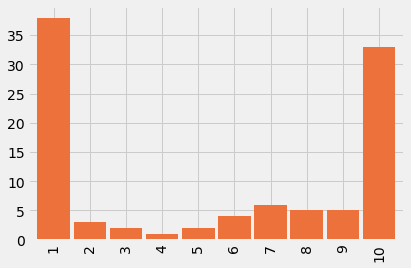

In [45]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.style.use('fivethirtyeight')

fake_data = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], index=range(1,11))

fake_data.plot.bar(color='#ed713a', width=0.9);

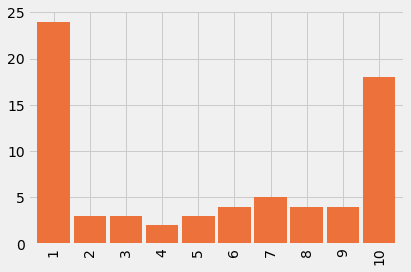

In [46]:
fd2 = pd.Series(
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

fd2.value_counts().sort_index().plot.bar(color='#ed713a', width=0.9);


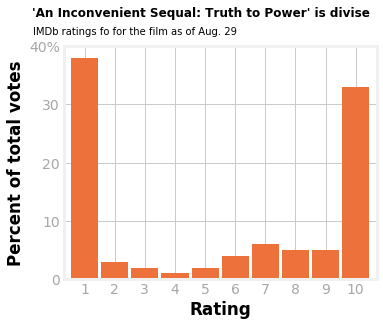

In [48]:
fig = plt.figure(facecolor='white', figsize=(5,4))
ax = fake_data.plot.bar(color='#ed713a', width=0.9)
ax.set(facecolor='white')
ax.patch.set_alpha(0.1)

plt.xlabel('Rating', fontweight='bold')
plt.ylabel('Percent of total votes', fontweight='bold')
plt.title("'An Inconvenient Sequal: Truth to Power' is divise", fontsize=12, loc='left', x=-0.1, y=1.1, fontweight='bold')

plt.text(x=-1.7, y=42, s='IMDb ratings fo for the film as of Aug. 29', fontsize=10)

plt.xticks(rotation=0, color='#a7a7a7')
plt.yticks(range(0, 50, 10), labels=[f'{i}' if i!=40 else f'{i}%' for i in range(0, 50, 10)], color='#a7a7a7');

##2-Replicate an Example from 538
### The Mayweather-McGregor Fight As Told Through Emojis

I'm going to try and recreate the first horizontal bar plot found on this article:
https://fivethirtyeight.com/features/the-mayweather-mcgregor-fight-as-told-through-emojis/

In [49]:
pip install emoji

In [50]:
pip install regex

In [0]:
import emoji
import regex

In [52]:
mm = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/mayweather-mcgregor/tweets.csv')
mm.head()

,created_at,emojis,id,link,retweeted,screen_name,text
0,2017-08-27 00:05:34,True,901656910939770881,https://twitter.com/statuses/901656910939770881,False,aaLiysr,Ringe çıkmadan ateş etmeye başladı 😃#McGregor ...
1,2017-08-27 00:05:35,True,901656917281574912,https://twitter.com/statuses/901656917281574912,False,zulmafrancozaf,😲😲😲😲😲 @lalylourbet2 https://t.co/ERUGHhQINE
2,2017-08-27 00:05:35,True,901656917105369088,https://twitter.com/statuses/901656917105369088,False,Adriana11D,🇮🇪🇮🇪🇮🇪 💪💪#MayweathervMcgregor
3,2017-08-27 00:05:35,True,901656917747142657,https://twitter.com/statuses/901656917747142657,False,Nathan_Caro_,Cest partit #MayweatherMcGregor 💪🏿
4,2017-08-27 00:05:35,True,901656916828594177,https://twitter.com/statuses/901656916828594177,False,sahouraxox,Low key feeling bad for ppl who payed to watch...


In [0]:
def emoji_creator(text):
  emojis = {}
  for i in text:
    count = 1
    if i in emoji.UNICODE_EMOJI:
      if i in emojis.keys():
        emojis[i] += 1
      else:
        emojis.update({i : count})
  return max(emojis, key=emojis.get)

In [67]:
test_emojis = mm['text'][1]
print(emoji_creator(test_emojis))

😲


In [0]:
mm['emojis_tweeted'] = [emoji_creator(i) for i in mm['text']]

In [112]:
mm.sort_values(by='created_at', ascending=False).head()

,created_at,emojis,id,link,retweeted,screen_name,text,emojis_tweeted
12117,2017-08-27 01:14:59,True,901674381738258432,https://twitter.com/statuses/901674381738258432,False,dudette0114,"Brilliant fight,🥊for a novice to go 9 rounds h...",🥊
12116,2017-08-27 01:14:58,True,901674378500472833,https://twitter.com/statuses/901674378500472833,False,ChoateNoah,Money Mayweather wit da dub!!🥊💸#TMT#TKO#Maywea...,🥊
12115,2017-08-27 01:14:58,True,901674378093613057,https://twitter.com/statuses/901674378093613057,False,lorybs_,😂😂😂😂😂😂😂 rs yo https://t.co/UgMn2HwX9X,😂
12114,2017-08-27 01:14:58,True,901674378458304516,https://twitter.com/statuses/901674378458304516,False,imjellly,😂🔫 https://t.co/VmsbbKmxRc,😂
12113,2017-08-27 01:14:57,True,901674373635080193,https://twitter.com/statuses/901674373635080193,False,tirivashe_md,I should have become a golfer 👀 https://t.co/I...,👀


In [118]:
emoji_counts = mm['emojis_tweeted'].value_counts().nlargest(10)
emoji_counts

😂    2949
🥊     939
👊     468
💪     372
👏     309
🇮     290
🤔     279
😭     258
🔥     244
🤣     224
Name: emojis_tweeted, dtype: int64

Two things are wrong here: First, I can't seem to replicate well enough the value counts of most commonly used emojis. I have more or less gotten a similar list of top ten, but the methodology they used clearly is different than mine when accounting for multiple. Second, there appears to be an additional 15 minutes included in the chart on the webpage than in the data set. The subtext on the website says the data goes from 12:05 to 1:30, where the GitHub data says it only includes those tweets up to 1:15. This additional post fight discussion could have skewed the results of my emoji dataset. For example, there may have been significant discussion after the fight was over regarding the purse each fighter took home, which might have significantly raised the value_count of the 💰 emoji in the 15 minutes that wasn't included in the data set on GitHub, but included in the table on the website.

In [0]:
counts = emoji_counts.rename_axis('Emoji').reset_index(name='Counts')
counts['Counts'] = [(i / len(mm.index)) * 100 for i in counts['Counts']]
counts.index += 1

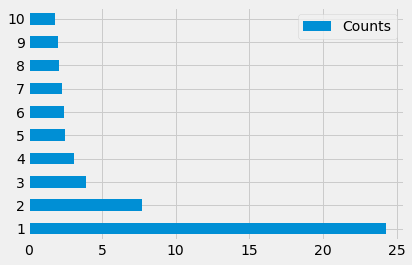

In [135]:
counts['Counts'] = counts['Counts'].astype(float).round(1)
counts.plot.barh()

<Figure size 432x288 with 0 Axes>

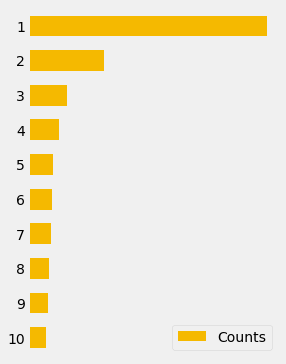

In [152]:
fig = plt.figure(facecolor='white')
ax = counts.plot(kind='barh', figsize=(4, 6), color='#f5b900', width=0.6)
ax.invert_yaxis()

ax.tick_params(labelbottom=False)
ax.grid(False)


# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here